<a href="https://colab.research.google.com/github/kamathanirudh/CreditWorthAnalysis/blob/main/CWA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_percentage_error


In [2]:
df=pd.read_csv("/content/drive/MyDrive/python/trainingData.csv")
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


## **Exploratory Analysis**

In [3]:
df.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40000 non-null  int64  
 1   city                   38136 non-null  object 
 2   age                    40000 non-null  int64  
 3   sex                    40000 non-null  object 
 4   social_class           34745 non-null  object 
 5   primary_business       39974 non-null  object 
 6   secondary_business     34759 non-null  object 
 7   annual_income          40000 non-null  float64
 8   monthly_expenses       39880 non-null  float64
 9   old_dependents         40000 non-null  int64  
 10  young_dependents       40000 non-null  int64  
 11  home_ownership         39621 non-null  float64
 12  type_of_house          39306 non-null  object 
 13  occupants_count        40000 non-null  int64  
 14  house_area             40000 non-null  float64
 15  sa

In [5]:
#Observations:

#We annot approve loan to people who have (monthly income x 12)>annual income
#Some Applicants have Anuual Income=0
#"ID" is not a feature for loan_amount prediction
#Significant Outliers in "AGE"

df = df[~((df['monthly_expenses'] * 12) > df['annual_income'])]
df = df[df['annual_income'] != 0]
df = df.drop('Id', axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23406 entries, 1 to 39999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   22114 non-null  object 
 1   age                    23406 non-null  int64  
 2   sex                    23406 non-null  object 
 3   social_class           23405 non-null  object 
 4   primary_business       23392 non-null  object 
 5   secondary_business     23406 non-null  object 
 6   annual_income          23406 non-null  float64
 7   monthly_expenses       23406 non-null  float64
 8   old_dependents         23406 non-null  int64  
 9   young_dependents       23406 non-null  int64  
 10  home_ownership         23406 non-null  float64
 11  type_of_house          23406 non-null  object 
 12  occupants_count        23406 non-null  int64  
 13  house_area             23406 non-null  float64
 14  sanitary_availability  23406 non-null  float64
 15  water_a

In [7]:
#Number of Null Values in each row
df.isna().sum()

city                     1292
age                         0
sex                         0
social_class                1
primary_business           14
secondary_business          0
annual_income               0
monthly_expenses            0
old_dependents              0
young_dependents            0
home_ownership              0
type_of_house               0
occupants_count             0
house_area                  0
sanitary_availability       0
water_availabity            0
loan_purpose               14
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [8]:
# Fill the empty columns with the mode value, as the null values are much less than the total number of rows

columns_to_fill = ["city", "primary_business", "social_class", "loan_purpose"]

for column in columns_to_fill:
  mode_value = df[column].mode()[0]
  df[column] = df[column].fillna(mode_value)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23406 entries, 1 to 39999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   23406 non-null  object 
 1   age                    23406 non-null  int64  
 2   sex                    23406 non-null  object 
 3   social_class           23406 non-null  object 
 4   primary_business       23406 non-null  object 
 5   secondary_business     23406 non-null  object 
 6   annual_income          23406 non-null  float64
 7   monthly_expenses       23406 non-null  float64
 8   old_dependents         23406 non-null  int64  
 9   young_dependents       23406 non-null  int64  
 10  home_ownership         23406 non-null  float64
 11  type_of_house          23406 non-null  object 
 12  occupants_count        23406 non-null  int64  
 13  house_area             23406 non-null  float64
 14  sanitary_availability  23406 non-null  float64
 15  water_a

In [10]:
df.describe()

,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,23406.000000,2.340600e+04,23406.000000,23406.000000,23406.000000,23406.000000,23406.000000,23406.000000,23406.000000,23406.000000,23406.000000,23406.000000,2.340600e+04
mean,36.513415,5.470750e+04,3309.347603,0.059429,1.302316,0.980091,43.691959,701.613432,0.741007,0.783389,11.994061,18.466333,9.044147e+03
std,9.076365,2.375518e+04,1387.795633,0.254196,1.077569,0.139692,6209.531633,5990.458916,0.438189,0.254150,1.486882,14.403006,1.397880e+04
min,18.000000,4.000000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,6.000000,0.000000,2.000000e+02
25%,30.000000,4.500000e+04,2500.000000,0.000000,0.000000,1.000000,2.000000,280.000000,0.000000,0.500000,12.000000,12.000000,7.000000e+03
50%,36.000000,5.280000e+04,3000.000000,0.000000,1.000000,1.000000,3.000000,500.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,43.000000,6.000000e+04,4000.000000,0.000000,2.000000,1.000000,4.000000,750.000000,1.000000,1.000000,12.000000,12.000000,1.000000e+04
max,88.000000,1.200000e+06,16000.000000,3.000000,7.000000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


In [11]:
#Outliers in Age have automatically been taken care of, and lie between the ages of 18-88 with a mean value of 36 years

In [12]:
#Remove rows that have ((annual_income/12) * loan_tenure) < loan_amount
df = df[~(((df['annual_income'] / 12) * df['loan_tenure']) < df['loan_amount'])]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23390 entries, 1 to 39999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   23390 non-null  object 
 1   age                    23390 non-null  int64  
 2   sex                    23390 non-null  object 
 3   social_class           23390 non-null  object 
 4   primary_business       23390 non-null  object 
 5   secondary_business     23390 non-null  object 
 6   annual_income          23390 non-null  float64
 7   monthly_expenses       23390 non-null  float64
 8   old_dependents         23390 non-null  int64  
 9   young_dependents       23390 non-null  int64  
 10  home_ownership         23390 non-null  float64
 11  type_of_house          23390 non-null  object 
 12  occupants_count        23390 non-null  int64  
 13  house_area             23390 non-null  float64
 14  sanitary_availability  23390 non-null  float64
 15  water_a

In [14]:
df.describe()

,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,23390.000000,2.339000e+04,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000,23390.000000
mean,36.515306,5.471638e+04,3309.391193,0.059470,1.303121,0.980120,43.719282,701.774861,0.740958,0.783326,11.991749,18.471184,8784.677212
std,9.075858,2.375674e+04,1387.754981,0.254279,1.077423,0.139592,6211.655097,5992.495222,0.438216,0.254163,1.477516,14.406111,3348.070203
min,18.000000,4.000000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,6.000000,0.000000,200.000000
25%,30.000000,4.500000e+04,2500.000000,0.000000,0.000000,1.000000,2.000000,280.000000,0.000000,0.500000,12.000000,12.000000,7000.000000
50%,36.000000,5.280000e+04,3000.000000,0.000000,1.000000,1.000000,3.000000,500.000000,1.000000,1.000000,12.000000,12.000000,8000.000000
75%,43.000000,6.000000e+04,4000.000000,0.000000,2.000000,1.000000,4.000000,750.000000,1.000000,1.000000,12.000000,12.000000,10000.000000
max,88.000000,1.200000e+06,16000.000000,3.000000,7.000000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,150000.000000


In [15]:
#Handle all outliers and mistyped data

In [16]:
df = df[df['water_availabity'] != -1]

df = df[df['occupants_count'] != 950000]

df = df[df['sanitary_availability'] != -1]

df = df[df['city'] != 752102]

In [17]:
df.describe()

,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,23388.000000,2.338800e+04,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000
mean,36.514666,5.471695e+04,3309.374893,0.059475,1.303104,0.980118,3.103771,701.766461,0.741021,0.783393,11.991748,18.471738,8784.744313
std,9.075511,2.375742e+04,1387.743875,0.254289,1.077457,0.139598,6.770477,5992.749596,0.438083,0.253902,1.477579,14.406602,3348.205496
min,18.000000,4.000000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,200.000000
25%,30.000000,4.500000e+04,2500.000000,0.000000,0.000000,1.000000,2.000000,280.000000,0.000000,0.500000,12.000000,12.000000,7000.000000
50%,36.000000,5.280000e+04,3000.000000,0.000000,1.000000,1.000000,3.000000,500.000000,1.000000,1.000000,12.000000,12.000000,8000.000000
75%,43.000000,6.000000e+04,4000.000000,0.000000,2.000000,1.000000,4.000000,750.000000,1.000000,1.000000,12.000000,12.000000,10000.000000
max,88.000000,1.200000e+06,16000.000000,3.000000,7.000000,1.000000,900.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,150000.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23388 entries, 1 to 39999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   23388 non-null  object 
 1   age                    23388 non-null  int64  
 2   sex                    23388 non-null  object 
 3   social_class           23388 non-null  object 
 4   primary_business       23388 non-null  object 
 5   secondary_business     23388 non-null  object 
 6   annual_income          23388 non-null  float64
 7   monthly_expenses       23388 non-null  float64
 8   old_dependents         23388 non-null  int64  
 9   young_dependents       23388 non-null  int64  
 10  home_ownership         23388 non-null  float64
 11  type_of_house          23388 non-null  object 
 12  occupants_count        23388 non-null  int64  
 13  house_area             23388 non-null  float64
 14  sanitary_availability  23388 non-null  float64
 15  water_a

In [19]:
#correlation matrix

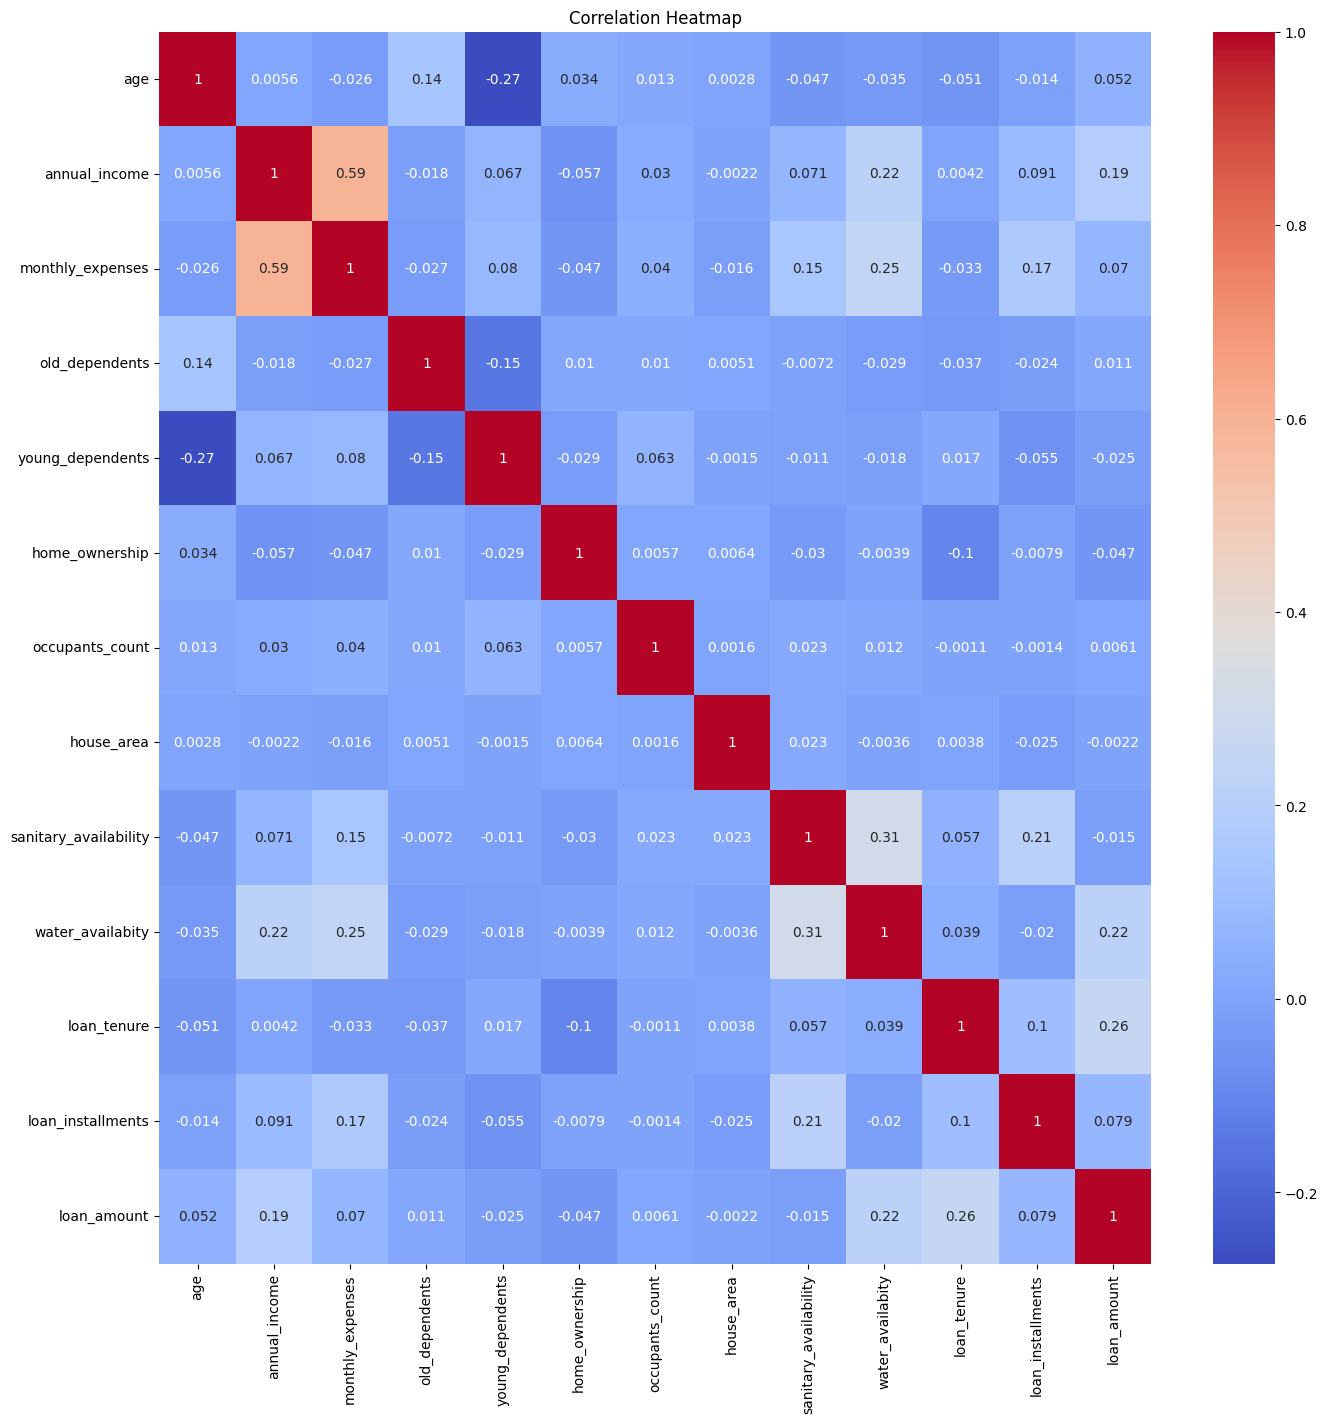

In [20]:
corr = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(16, 16))  # Adjust figure size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

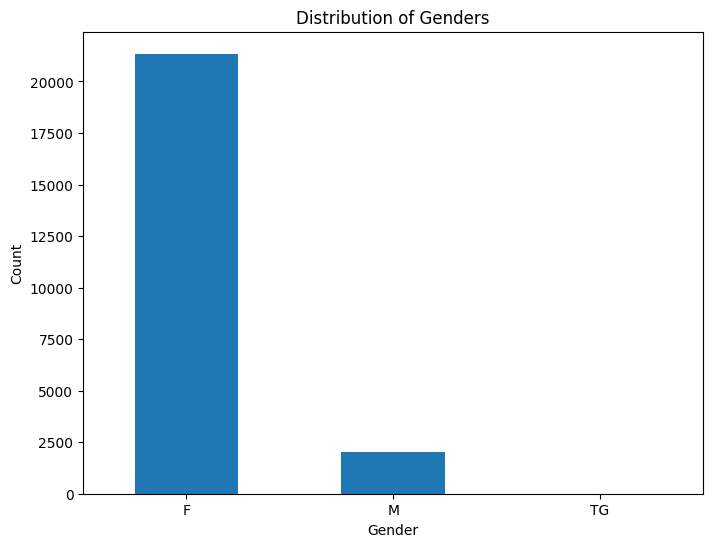

In [21]:
gender_counts = df['sex'].value_counts()

# Create bar graph
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

<Axes: xlabel='age', ylabel='Density'>

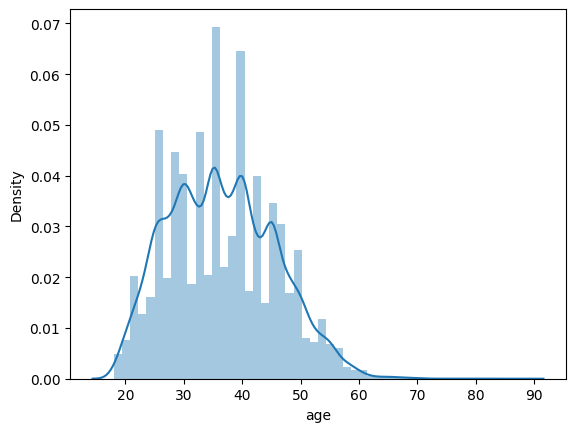

In [22]:
sns.distplot(df['age'])

In [23]:
#lowercase the rows as there are a lot of mistyped values for social_class and loan_purpose

In [24]:
for column in df.select_dtypes(include='object'):
    df[column] = df[column].str.lower()

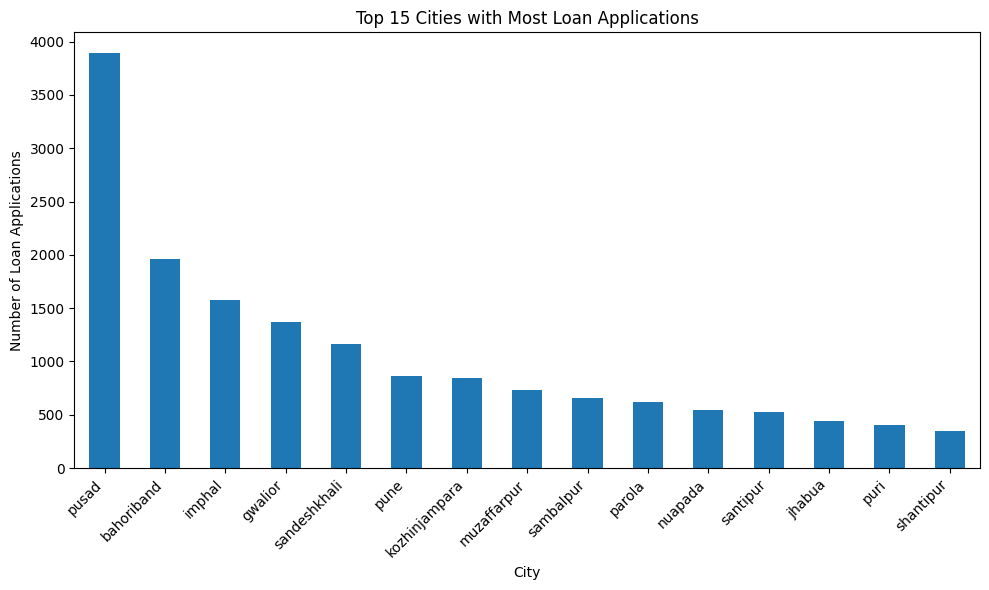

In [25]:
city_loan_counts = df['city'].value_counts()

top_n = 15
top_cities = city_loan_counts.head(top_n)

# Create bar graph
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Loan Applications')
plt.title(f'Top {top_n} Cities with Most Loan Applications')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23388 entries, 1 to 39999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   23388 non-null  object 
 1   age                    23388 non-null  int64  
 2   sex                    23388 non-null  object 
 3   social_class           23388 non-null  object 
 4   primary_business       23388 non-null  object 
 5   secondary_business     23388 non-null  object 
 6   annual_income          23388 non-null  float64
 7   monthly_expenses       23388 non-null  float64
 8   old_dependents         23388 non-null  int64  
 9   young_dependents       23388 non-null  int64  
 10  home_ownership         23388 non-null  float64
 11  type_of_house          23388 non-null  object 
 12  occupants_count        23388 non-null  int64  
 13  house_area             23388 non-null  float64
 14  sanitary_availability  23388 non-null  float64
 15  water_a

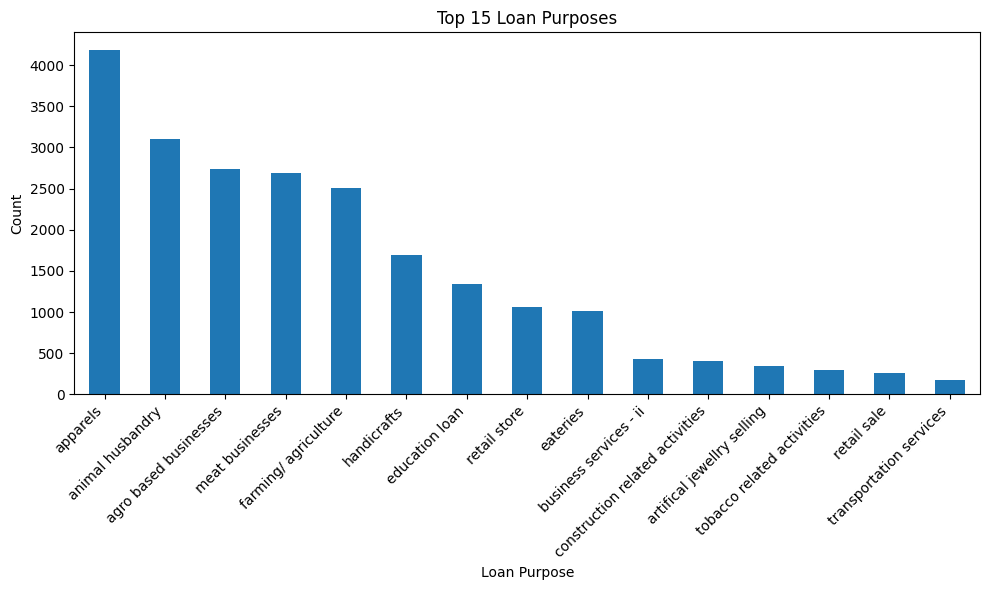

In [27]:
# Group by loan purpose and count occurrences
loan_purpose_counts = df['loan_purpose'].value_counts()

# Select the top N loan purposes (e.g., top 5)
top_n = 15
top_purposes = loan_purpose_counts.head(top_n)

# Create bar graph
plt.figure(figsize=(10, 6))
top_purposes.plot(kind='bar')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title(f'Top {top_n} Loan Purposes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [28]:
# Group by city, count loan applications, and find most common loan purpose
city_loan_data = df.groupby('city')['loan_purpose'].agg(['count', lambda x: x.value_counts().index[0]])

# Select the top 15 cities
top_15_cities = city_loan_data.sort_values('count', ascending=False).head(15)

# Rename the second column for clarity
top_15_cities = top_15_cities.rename(columns={top_15_cities.columns[1]: 'most_common_purpose'})

# Print the top 15 cities and their most common loan purposes
print(top_15_cities)

               count     most_common_purpose
city                                        
pusad           3893        animal husbandry
bahoriband      1966        animal husbandry
imphal          1581                apparels
gwalior         1372                apparels
sandeshkhali    1161         meat businesses
pune             862          education loan
kozhinjampara    847  business services - ii
muzaffarpur      729         meat businesses
sambalpur        659    farming/ agriculture
parola           619    farming/ agriculture
nuapada          545         meat businesses
santipur         524             handicrafts
jhabua           443                apparels
puri             403        animal husbandry
shantipur        352             handicrafts


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23388 entries, 1 to 39999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   23388 non-null  object 
 1   age                    23388 non-null  int64  
 2   sex                    23388 non-null  object 
 3   social_class           23388 non-null  object 
 4   primary_business       23388 non-null  object 
 5   secondary_business     23388 non-null  object 
 6   annual_income          23388 non-null  float64
 7   monthly_expenses       23388 non-null  float64
 8   old_dependents         23388 non-null  int64  
 9   young_dependents       23388 non-null  int64  
 10  home_ownership         23388 non-null  float64
 11  type_of_house          23388 non-null  object 
 12  occupants_count        23388 non-null  int64  
 13  house_area             23388 non-null  float64
 14  sanitary_availability  23388 non-null  float64
 15  water_a

In [30]:
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'city' has 348 unique values.
Column 'age' has 57 unique values.
Column 'sex' has 3 unique values.
Column 'social_class' has 386 unique values.
Column 'primary_business' has 375 unique values.
Column 'secondary_business' has 5 unique values.
Column 'annual_income' has 279 unique values.
Column 'monthly_expenses' has 202 unique values.
Column 'old_dependents' has 4 unique values.
Column 'young_dependents' has 8 unique values.
Column 'home_ownership' has 2 unique values.
Column 'type_of_house' has 3 unique values.
Column 'occupants_count' has 17 unique values.
Column 'house_area' has 293 unique values.
Column 'sanitary_availability' has 2 unique values.
Column 'water_availabity' has 3 unique values.
Column 'loan_purpose' has 35 unique values.
Column 'loan_tenure' has 10 unique values.
Column 'loan_installments' has 14 unique values.
Column 'loan_amount' has 64 unique values.


In [31]:
df.describe()

,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,23388.000000,2.338800e+04,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000,23388.000000
mean,36.514666,5.471695e+04,3309.374893,0.059475,1.303104,0.980118,3.103771,701.766461,0.741021,0.783393,11.991748,18.471738,8784.744313
std,9.075511,2.375742e+04,1387.743875,0.254289,1.077457,0.139598,6.770477,5992.749596,0.438083,0.253902,1.477579,14.406602,3348.205496
min,18.000000,4.000000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,200.000000
25%,30.000000,4.500000e+04,2500.000000,0.000000,0.000000,1.000000,2.000000,280.000000,0.000000,0.500000,12.000000,12.000000,7000.000000
50%,36.000000,5.280000e+04,3000.000000,0.000000,1.000000,1.000000,3.000000,500.000000,1.000000,1.000000,12.000000,12.000000,8000.000000
75%,43.000000,6.000000e+04,4000.000000,0.000000,2.000000,1.000000,4.000000,750.000000,1.000000,1.000000,12.000000,12.000000,10000.000000
max,88.000000,1.200000e+06,16000.000000,3.000000,7.000000,1.000000,900.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,150000.000000


In [32]:
#Cleaning mistyped data
df = df[df['house_area'] <= 100000]


In [33]:
# Encoding for sex

# Create dummy variables for the 'sex' column
dummy_sex = pd.get_dummies(df['sex'], prefix='sex')

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_sex], axis=1)

# Remove the original 'sex' column if needed
df = df.drop('sex', axis=1)

In [34]:
df

,city,age,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,...,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount,sex_f,sex_m,sex_tg
1,manjapra,21,obc,tailoring,none,94000.0,3600.0,1,1,1.0,...,80.0,1.0,0.5,apparels,12,50,7500.0,True,False,False
2,dhanbad,24,nai,beauty salon,others,48000.0,4000.0,0,2,1.0,...,50.0,1.0,0.5,beauty salon,12,12,5000.0,False,True,False
6,dhanbad,22,muchi,tailoring,others,36000.0,3000.0,0,1,1.0,...,60.0,1.0,0.5,apparels,12,12,5000.0,True,False,False
10,pusad,25,obc,poultry farm,daily wage labourer,40000.0,3000.0,0,0,1.0,...,110.0,1.0,0.5,meat businesses,12,12,5000.0,True,False,False
11,dhanbad,26,muchi,puffed rice business,others,60000.0,5000.0,0,3,1.0,...,50.0,1.0,0.5,eateries,12,12,5000.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,pusad,45,muslim,buffalo rearing,none,78000.0,4000.0,0,0,1.0,...,600.0,1.0,1.0,animal husbandry,12,12,8000.0,True,False,False
39996,pusad,35,st,tailoring,none,48000.0,4000.0,0,3,1.0,...,800.0,1.0,1.0,apparels,12,12,8000.0,True,False,False
39997,pusad,35,sc,goat rearing,none,48000.0,3500.0,0,2,1.0,...,600.0,1.0,1.0,meat businesses,12,12,8000.0,True,False,False
39998,pusad,28,sc,goat rearing,none,48000.0,4000.0,0,3,1.0,...,600.0,1.0,1.0,meat businesses,12,12,8000.0,True,False,False


In [35]:
# Label Encoding categorical data


# Encode 'type_of_house'
dummy_house = pd.get_dummies(df['type_of_house'], prefix='house')
df = pd.concat([df, dummy_house], axis=1)
df = df.drop('type_of_house', axis=1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['secondary_business_encoded'] = le.fit_transform(df['secondary_business'])
df = df.drop('secondary_business', axis=1)


columns_to_encode = ['city', 'social_class', 'primary_business', 'loan_purpose']

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [36]:
df

,city,age,social_class,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,...,loan_tenure,loan_installments,loan_amount,sex_f,sex_m,sex_tg,house_r,house_t1,house_t2,secondary_business_encoded
1,181,21,271,331,94000.0,3600.0,1,1,1.0,4,...,12,50,7500.0,True,False,False,False,True,False,3
2,66,24,249,24,48000.0,4000.0,0,2,1.0,4,...,12,12,5000.0,False,True,False,False,True,False,4
6,66,22,233,331,36000.0,3000.0,0,1,1.0,3,...,12,12,5000.0,True,False,False,False,True,False,4
10,265,25,271,270,40000.0,3000.0,0,0,1.0,1,...,12,12,5000.0,True,False,False,False,True,False,1
11,66,26,233,277,60000.0,5000.0,0,3,1.0,5,...,12,12,5000.0,True,False,False,True,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,265,45,239,43,78000.0,4000.0,0,0,1.0,2,...,12,12,8000.0,True,False,False,False,False,True,3
39996,265,35,341,331,48000.0,4000.0,0,3,1.0,4,...,12,12,8000.0,True,False,False,False,False,True,3
39997,265,35,319,157,48000.0,3500.0,0,2,1.0,3,...,12,12,8000.0,True,False,False,False,False,True,3
39998,265,28,319,157,48000.0,4000.0,0,3,1.0,4,...,12,12,8000.0,True,False,False,False,False,True,3


In [37]:
# Get a list of all columns
cols = df.columns.tolist()

# Move 'loan_amount' to the end
cols.remove('loan_amount')
cols.append('loan_amount')

# Reorder the DataFrame columns
df = df[cols]

In [38]:
df

,city,age,social_class,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,...,loan_tenure,loan_installments,sex_f,sex_m,sex_tg,house_r,house_t1,house_t2,secondary_business_encoded,loan_amount
1,181,21,271,331,94000.0,3600.0,1,1,1.0,4,...,12,50,True,False,False,False,True,False,3,7500.0
2,66,24,249,24,48000.0,4000.0,0,2,1.0,4,...,12,12,False,True,False,False,True,False,4,5000.0
6,66,22,233,331,36000.0,3000.0,0,1,1.0,3,...,12,12,True,False,False,False,True,False,4,5000.0
10,265,25,271,270,40000.0,3000.0,0,0,1.0,1,...,12,12,True,False,False,False,True,False,1,5000.0
11,66,26,233,277,60000.0,5000.0,0,3,1.0,5,...,12,12,True,False,False,True,False,False,4,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,265,45,239,43,78000.0,4000.0,0,0,1.0,2,...,12,12,True,False,False,False,False,True,3,8000.0
39996,265,35,341,331,48000.0,4000.0,0,3,1.0,4,...,12,12,True,False,False,False,False,True,3,8000.0
39997,265,35,319,157,48000.0,3500.0,0,2,1.0,3,...,12,12,True,False,False,False,False,True,3,8000.0
39998,265,28,319,157,48000.0,4000.0,0,3,1.0,4,...,12,12,True,False,False,False,False,True,3,8000.0


In [39]:
#Feature Imporance, Model Building, Training and Testing of data

In [40]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column as the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
X

,city,age,social_class,primary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,...,loan_purpose,loan_tenure,loan_installments,sex_f,sex_m,sex_tg,house_r,house_t1,house_t2,secondary_business_encoded
1,181,21,271,331,94000.0,3600.0,1,1,1.0,4,...,3,12,50,True,False,False,False,True,False,3
2,66,24,249,24,48000.0,4000.0,0,2,1.0,4,...,5,12,12,False,True,False,False,True,False,4
6,66,22,233,331,36000.0,3000.0,0,1,1.0,3,...,3,12,12,True,False,False,False,True,False,4
10,265,25,271,270,40000.0,3000.0,0,0,1.0,1,...,20,12,12,True,False,False,False,True,False,1
11,66,26,233,277,60000.0,5000.0,0,3,1.0,5,...,12,12,12,True,False,False,True,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,265,45,239,43,78000.0,4000.0,0,0,1.0,2,...,2,12,12,True,False,False,False,False,True,3
39996,265,35,341,331,48000.0,4000.0,0,3,1.0,4,...,3,12,12,True,False,False,False,False,True,3
39997,265,35,319,157,48000.0,3500.0,0,2,1.0,3,...,20,12,12,True,False,False,False,False,True,3
39998,265,28,319,157,48000.0,4000.0,0,3,1.0,4,...,20,12,12,True,False,False,False,False,True,3


In [42]:
y

1        7500.0
2        5000.0
6        5000.0
10       5000.0
11       5000.0
          ...  
39995    8000.0
39996    8000.0
39997    8000.0
39998    8000.0
39999    8000.0
Name: loan_amount, Length: 23383, dtype: float64

In [43]:
# Feature Importance

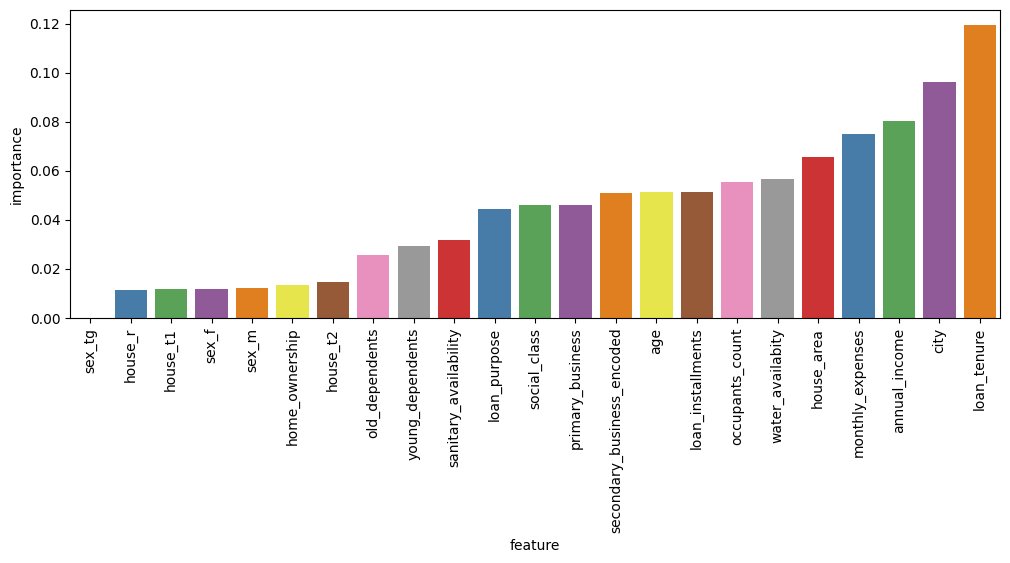

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)
extra_trees.fit(X_train, y_train)
feat_importances = pd.Series(extra_trees.feature_importances_, X_train.columns).reset_index()
feat_importances = feat_importances.rename(columns={'index': 'feature', 0: 'importance'}).sort_values(by='importance')
plt.figure(figsize=(12,4))
sns.barplot(data=feat_importances, x='feature', y='importance', palette='Set1')
plt.xticks(rotation=90)

plt.show()

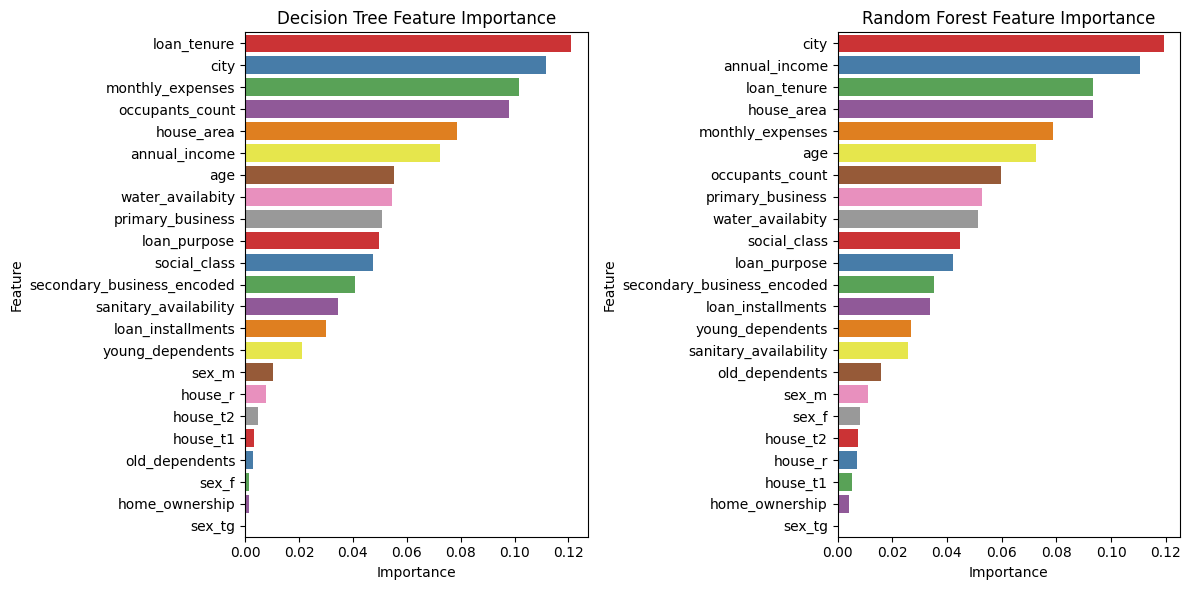

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train, y_train are your training data
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_feature_importances = dt.feature_importances_

# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_feature_importances = rf.feature_importances_

# Create DataFrames for plotting
dt_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt_feature_importances})
rf_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_feature_importances})

# Sort DataFrames by importance
dt_df = dt_df.sort_values('Importance', ascending=False)
rf_df = rf_df.sort_values('Importance', ascending=False)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Decision Tree Feature Importance
sns.barplot(x='Importance', y='Feature', data=dt_df, ax=ax[0], palette='Set1')
ax[0].set_title('Decision Tree Feature Importance')

# Random Forest Feature Importance
sns.barplot(x='Importance', y='Feature', data=rf_df, ax=ax[1], palette='Set1')
ax[1].set_title('Random Forest Feature Importance')

plt.tight_layout()
plt.show()

In [46]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming X_train, X_test, y_train, y_test are your split data
# Initialize result DataFrame
results_df = pd.DataFrame(columns=['Model',"Accuracy", 'RMSE', 'MSE', 'MAE', 'R2'])

# SVM Kernel Regressor
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate SVM
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

SVM_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
SVM_prediction_df['Actual_loan_amount'] = y_test.values
SVM_prediction_df['error_rate']=(abs(SVM_prediction_df['Actual_loan_amount']-SVM_prediction_df['Predicted_loan_amount'])/SVM_prediction_df['Actual_loan_amount'])*100
dt_mean_error=SVM_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error
mape = mean_absolute_percentage_error(y_test, y_pred)


# Append SVM results to DataFrame
new_row = pd.DataFrame({'Model': ['SVM'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse], 'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

  Model  Accuracy         RMSE  MSE          MAE       R2      MAPE
0   SVM  74.28132  3313.621517  NaN  2163.059923 -0.05622  0.257187


In [47]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train, X_test, y_train, y_test are your split data
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

RFR_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
RFR_prediction_df['Actual_loan_amount'] = y_test.values
RFR_prediction_df['error_rate']=(abs(RFR_prediction_df['Actual_loan_amount']-RFR_prediction_df['Predicted_loan_amount'])/RFR_prediction_df['Actual_loan_amount'])*100
dt_mean_error=RFR_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error

new_row = pd.DataFrame({'Model': ['RFR'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse], 'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

  Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
0   SVM  74.281320  3313.621517  NaN  2163.059923 -0.056220  0.257187
1   RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303


In [48]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are your split data
model = xgb.XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


RFR_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
RFR_prediction_df['Actual_loan_amount'] = y_test.values
RFR_prediction_df['error_rate']=(abs(RFR_prediction_df['Actual_loan_amount']-RFR_prediction_df['Predicted_loan_amount'])/RFR_prediction_df['Actual_loan_amount'])*100
dt_mean_error=RFR_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error

new_row = pd.DataFrame({'Model': ['XGB'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse], 'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

  Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
0   SVM  74.281320  3313.621517  NaN  2163.059923 -0.056220  0.257187
1   RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303
2   XGB  84.310577  1998.601099  NaN  1301.257479  0.615761  0.156894


In [49]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(base_estimator=xgb.XGBRegressor(n_estimators=100))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


BagXGB_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
BagXGB_prediction_df['Actual_loan_amount'] = y_test.values
BagXGB_prediction_df['error_rate']=(abs(BagXGB_prediction_df['Actual_loan_amount']-BagXGB_prediction_df['Predicted_loan_amount'])/BagXGB_prediction_df['Actual_loan_amount'])*100
dt_mean_error=BagXGB_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error


new_row = pd.DataFrame({'Model': ['BAGxgb'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse], 'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

    Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
0     SVM  74.281320  3313.621517  NaN  2163.059923 -0.056220  0.257187
1     RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303
2     XGB  84.310577  1998.601099  NaN  1301.257479  0.615761  0.156894
3  BAGxgb  84.809723  2004.528711  NaN  1266.459727  0.613479  0.151903


In [50]:
columns_to_remove = ['sex_tg', 'house_r', 'sex_m', 'sex_f', 'home_ownership', 'house_t1', 'house_t2']
X_train = X_train.drop(columns_to_remove, axis=1)
X_test = X_test.drop(columns_to_remove, axis=1)


In [51]:
model = BaggingRegressor(base_estimator=xgb.XGBRegressor(n_estimators=100))
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


BagXGB_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
BagXGB_prediction_df['Actual_loan_amount'] = y_test.values
BagXGB_prediction_df['error_rate']=(abs(BagXGB_prediction_df['Actual_loan_amount']-BagXGB_prediction_df['Predicted_loan_amount'])/BagXGB_prediction_df['Actual_loan_amount'])*100
dt_mean_error=BagXGB_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error

new_row = pd.DataFrame({'Model': ['BAGxgb2'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse], 'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

     Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
0      SVM  74.281320  3313.621517  NaN  2163.059923 -0.056220  0.257187
1      RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303
2      XGB  84.310577  1998.601099  NaN  1301.257479  0.615761  0.156894
3   BAGxgb  84.809723  2004.528711  NaN  1266.459727  0.613479  0.151903
4  BAGxgb2  84.588130  2062.783795  NaN  1279.934293  0.590686  0.154119


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are your split data
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


RFR_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
RFR_prediction_df['Actual_loan_amount'] = y_test.values
RFR_prediction_df['error_rate']=(abs(RFR_prediction_df['Actual_loan_amount']-RFR_prediction_df['Predicted_loan_amount'])/RFR_prediction_df['Actual_loan_amount'])*100
dt_mean_error=RFR_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error

new_row = pd.DataFrame({'Model': ['RFR(edit)'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse],'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

       Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
0        SVM  74.281320  3313.621517  NaN  2163.059923 -0.056220  0.257187
1        RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303
2        XGB  84.310577  1998.601099  NaN  1301.257479  0.615761  0.156894
3     BAGxgb  84.809723  2004.528711  NaN  1266.459727  0.613479  0.151903
4    BAGxgb2  84.588130  2062.783795  NaN  1279.934293  0.590686  0.154119
5  RFR(edit)  85.869530  2029.428587  NaN  1189.026926  0.603817  0.141305


In [53]:
import xgboost as xgb
# Assuming X_train, X_test, y_train, y_test are your split data
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


XGB_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
XGB_prediction_df['Actual_loan_amount'] = y_test.values
XGB_prediction_df['error_rate']=(abs(XGB_prediction_df['Actual_loan_amount']-XGB_prediction_df['Predicted_loan_amount'])/XGB_prediction_df['Actual_loan_amount'])*100
dt_mean_error=XGB_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error

new_row = pd.DataFrame({'Model': ['XGB(edit)'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse], 'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

       Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
0        SVM  74.281320  3313.621517  NaN  2163.059923 -0.056220  0.257187
1        RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303
2        XGB  84.310577  1998.601099  NaN  1301.257479  0.615761  0.156894
3     BAGxgb  84.809723  2004.528711  NaN  1266.459727  0.613479  0.151903
4    BAGxgb2  84.588130  2062.783795  NaN  1279.934293  0.590686  0.154119
5  RFR(edit)  85.869530  2029.428587  NaN  1189.026926  0.603817  0.141305
6  XGB(edit)  84.321572  2017.180362  NaN  1297.590040  0.608584  0.156784


In [54]:
X_train= X_train.drop('old_dependents', axis=1)
X_test= X_test.drop('old_dependents', axis=1)

In [55]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


RFR_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
RFR_prediction_df['Actual_loan_amount'] = y_test.values
RFR_prediction_df['error_rate']=(abs(RFR_prediction_df['Actual_loan_amount']-RFR_prediction_df['Predicted_loan_amount'])/RFR_prediction_df['Actual_loan_amount'])*100
dt_mean_error=RFR_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error

new_row = pd.DataFrame({'Model': ['RFR(edit2)'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse], 'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

        Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
0         SVM  74.281320  3313.621517  NaN  2163.059923 -0.056220  0.257187
1         RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303
2         XGB  84.310577  1998.601099  NaN  1301.257479  0.615761  0.156894
3      BAGxgb  84.809723  2004.528711  NaN  1266.459727  0.613479  0.151903
4     BAGxgb2  84.588130  2062.783795  NaN  1279.934293  0.590686  0.154119
5   RFR(edit)  85.869530  2029.428587  NaN  1189.026926  0.603817  0.141305
6   XGB(edit)  84.321572  2017.180362  NaN  1297.590040  0.608584  0.156784
7  RFR(edit2)  85.798378  2070.254200  NaN  1192.169400  0.587716  0.142016


In [56]:
model = BaggingRegressor(base_estimator=xgb.XGBRegressor(n_estimators=100))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

BAG_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
BAG_prediction_df['Actual_loan_amount'] = y_test.values
BAG_prediction_df['error_rate']=(abs(BAG_prediction_df['Actual_loan_amount']-BAG_prediction_df['Predicted_loan_amount'])/BAG_prediction_df['Actual_loan_amount'])*100
dt_mean_error=BAG_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error

new_row = pd.DataFrame({'Model': ['BAGxgb3'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse], 'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

        Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
0         SVM  74.281320  3313.621517  NaN  2163.059923 -0.056220  0.257187
1         RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303
2         XGB  84.310577  1998.601099  NaN  1301.257479  0.615761  0.156894
3      BAGxgb  84.809723  2004.528711  NaN  1266.459727  0.613479  0.151903
4     BAGxgb2  84.588130  2062.783795  NaN  1279.934293  0.590686  0.154119
5   RFR(edit)  85.869530  2029.428587  NaN  1189.026926  0.603817  0.141305
6   XGB(edit)  84.321572  2017.180362  NaN  1297.590040  0.608584  0.156784
7  RFR(edit2)  85.798378  2070.254200  NaN  1192.169400  0.587716  0.142016
8     BAGxgb3  84.608258  2083.085010  NaN  1280.635073  0.582590  0.153917


In [57]:
import xgboost as xgb
# Assuming X_train, X_test, y_train, y_test are your split data
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


XGB_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
XGB_prediction_df['Actual_loan_amount'] = y_test.values
XGB_prediction_df['error_rate']=(abs(XGB_prediction_df['Actual_loan_amount']-XGB_prediction_df['Predicted_loan_amount'])/XGB_prediction_df['Actual_loan_amount'])*100
dt_mean_error=XGB_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error

new_row = pd.DataFrame({'Model': ['XGB(edit2)'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse], 'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

        Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
0         SVM  74.281320  3313.621517  NaN  2163.059923 -0.056220  0.257187
1         RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303
2         XGB  84.310577  1998.601099  NaN  1301.257479  0.615761  0.156894
3      BAGxgb  84.809723  2004.528711  NaN  1266.459727  0.613479  0.151903
4     BAGxgb2  84.588130  2062.783795  NaN  1279.934293  0.590686  0.154119
5   RFR(edit)  85.869530  2029.428587  NaN  1189.026926  0.603817  0.141305
6   XGB(edit)  84.321572  2017.180362  NaN  1297.590040  0.608584  0.156784
7  RFR(edit2)  85.798378  2070.254200  NaN  1192.169400  0.587716  0.142016
8     BAGxgb3  84.608258  2083.085010  NaN  1280.635073  0.582590  0.153917
9  XGB(edit2)  84.282263  2037.836668  NaN  1303.403480  0.600527  0.157177


In [58]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# 2. Calculate Residuals
y_train_residuals = y_train - lasso_model.predict(X_train)

# 3. Train Random Forest on Residuals
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_residuals)

# 4. Make Predictions (combining Lasso and Random Forest)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_combined = y_pred_lasso + y_pred_rf

score = r2_score(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_combined))
mse = mean_squared_error(y_test, y_pred_combined)
mape = mean_absolute_percentage_error(y_test, y_pred)


Lasso_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
Lasso_prediction_df['Actual_loan_amount'] = y_test.values
Lasso_prediction_df['error_rate']=(abs(Lasso_prediction_df['Actual_loan_amount']-Lasso_prediction_df['Predicted_loan_amount'])/Lasso_prediction_df['Actual_loan_amount'])*100
dt_mean_error=Lasso_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error

# 7. Add Metrics to DataFrame
new_row = pd.DataFrame({'Model': ['Lasso+RF'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse], 'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
# Display updated DataFrame
print(results_df)

         Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
0          SVM  74.281320  3313.621517  NaN  2163.059923 -0.056220  0.257187
1          RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303
2          XGB  84.310577  1998.601099  NaN  1301.257479  0.615761  0.156894
3       BAGxgb  84.809723  2004.528711  NaN  1266.459727  0.613479  0.151903
4      BAGxgb2  84.588130  2062.783795  NaN  1279.934293  0.590686  0.154119
5    RFR(edit)  85.869530  2029.428587  NaN  1189.026926  0.603817  0.141305
6    XGB(edit)  84.321572  2017.180362  NaN  1297.590040  0.608584  0.156784
7   RFR(edit2)  85.798378  2070.254200  NaN  1192.169400  0.587716  0.142016
8      BAGxgb3  84.608258  2083.085010  NaN  1280.635073  0.582590  0.153917
9   XGB(edit2)  84.282263  2037.836668  NaN  1303.403480  0.600527  0.157177
10    Lasso+RF  84.282263  2101.536563  NaN  1221.316760  0.600527  0.157177


In [59]:
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# 2. Calculate Residuals
y_train_residuals = y_train - lasso_model.predict(X_train)

# 3. Train Random Forest on Residuals
bag_model = BaggingRegressor(base_estimator=xgb.XGBRegressor(n_estimators=100), n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train_residuals)

# 4. Make Predictions (combining Lasso and Random Forest)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_rf = bag_model.predict(X_test)
y_pred_combined = y_pred_lasso + y_pred_rf

score = r2_score(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_combined))
mse = mean_squared_error(y_test, y_pred_combined)
mape = mean_absolute_percentage_error(y_test, y_pred)

Lasso_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
Lasso_prediction_df['Actual_loan_amount'] = y_test.values
Lasso_prediction_df['error_rate']=(abs(Lasso_prediction_df['Actual_loan_amount']-Lasso_prediction_df['Predicted_loan_amount'])/Lasso_prediction_df['Actual_loan_amount'])*100
dt_mean_error=Lasso_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error

# 7. Add Metrics to DataFrame
new_row = pd.DataFrame({'Model': ['Lasso+RF'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse], 'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
# Display updated DataFrame
print(results_df)

         Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
0          SVM  74.281320  3313.621517  NaN  2163.059923 -0.056220  0.257187
1          RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303
2          XGB  84.310577  1998.601099  NaN  1301.257479  0.615761  0.156894
3       BAGxgb  84.809723  2004.528711  NaN  1266.459727  0.613479  0.151903
4      BAGxgb2  84.588130  2062.783795  NaN  1279.934293  0.590686  0.154119
5    RFR(edit)  85.869530  2029.428587  NaN  1189.026926  0.603817  0.141305
6    XGB(edit)  84.321572  2017.180362  NaN  1297.590040  0.608584  0.156784
7   RFR(edit2)  85.798378  2070.254200  NaN  1192.169400  0.587716  0.142016
8      BAGxgb3  84.608258  2083.085010  NaN  1280.635073  0.582590  0.153917
9   XGB(edit2)  84.282263  2037.836668  NaN  1303.403480  0.600527  0.157177
10    Lasso+RF  84.282263  2101.536563  NaN  1221.316760  0.600527  0.157177
11    Lasso+RF  84.282263  2113.370871  NaN  1288.718068  0.600527  0.157177

In [60]:
#Checking, if dropping less significant features helps improve the modl

In [61]:
X = X.drop(['city', 'social_class', 'primary_business', 'loan_purpose'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
X

,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,sex_f,sex_m,sex_tg,house_r,house_t1,house_t2,secondary_business_encoded
1,21,94000.0,3600.0,1,1,1.0,4,80.0,1.0,0.5,12,50,True,False,False,False,True,False,3
2,24,48000.0,4000.0,0,2,1.0,4,50.0,1.0,0.5,12,12,False,True,False,False,True,False,4
6,22,36000.0,3000.0,0,1,1.0,3,60.0,1.0,0.5,12,12,True,False,False,False,True,False,4
10,25,40000.0,3000.0,0,0,1.0,1,110.0,1.0,0.5,12,12,True,False,False,False,True,False,1
11,26,60000.0,5000.0,0,3,1.0,5,50.0,1.0,0.5,12,12,True,False,False,True,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,45,78000.0,4000.0,0,0,1.0,2,600.0,1.0,1.0,12,12,True,False,False,False,False,True,3
39996,35,48000.0,4000.0,0,3,1.0,4,800.0,1.0,1.0,12,12,True,False,False,False,False,True,3
39997,35,48000.0,3500.0,0,2,1.0,3,600.0,1.0,1.0,12,12,True,False,False,False,False,True,3
39998,28,48000.0,4000.0,0,3,1.0,4,600.0,1.0,1.0,12,12,True,False,False,False,False,True,3


In [63]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train, X_test, y_train, y_test are your split data
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


RFR_prediction_df = pd.DataFrame(y_pred, columns=["Predicted_loan_amount"])
RFR_prediction_df['Actual_loan_amount'] = y_test.values
RFR_prediction_df['error_rate']=(abs(RFR_prediction_df['Actual_loan_amount']-RFR_prediction_df['Predicted_loan_amount'])/RFR_prediction_df['Actual_loan_amount'])*100
dt_mean_error=RFR_prediction_df.error_rate.mean()
dt_mean_accuracy=100-dt_mean_error

new_row = pd.DataFrame({'Model': ['RFR'],"Accuracy":[dt_mean_accuracy], 'RMSE': [rmse], 'MAPE': [mape], 'MAE': [mae], 'R2': [r2]})
results_df = pd.concat([results_df, new_row], ignore_index=True)
print(results_df)

         Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
0          SVM  74.281320  3313.621517  NaN  2163.059923 -0.056220  0.257187
1          RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303
2          XGB  84.310577  1998.601099  NaN  1301.257479  0.615761  0.156894
3       BAGxgb  84.809723  2004.528711  NaN  1266.459727  0.613479  0.151903
4      BAGxgb2  84.588130  2062.783795  NaN  1279.934293  0.590686  0.154119
5    RFR(edit)  85.869530  2029.428587  NaN  1189.026926  0.603817  0.141305
6    XGB(edit)  84.321572  2017.180362  NaN  1297.590040  0.608584  0.156784
7   RFR(edit2)  85.798378  2070.254200  NaN  1192.169400  0.587716  0.142016
8      BAGxgb3  84.608258  2083.085010  NaN  1280.635073  0.582590  0.153917
9   XGB(edit2)  84.282263  2037.836668  NaN  1303.403480  0.600527  0.157177
10    Lasso+RF  84.282263  2101.536563  NaN  1221.316760  0.600527  0.157177
11    Lasso+RF  84.282263  2113.370871  NaN  1288.718068  0.600527  0.157177

In [64]:
df_sorted =results_df.sort_values(by='Accuracy', ascending=False)
print(df_sorted)

         Model   Accuracy         RMSE  MSE          MAE        R2      MAPE
1          RFR  86.069699  2017.493801  NaN  1173.686862  0.608463  0.139303
5    RFR(edit)  85.869530  2029.428587  NaN  1189.026926  0.603817  0.141305
7   RFR(edit2)  85.798378  2070.254200  NaN  1192.169400  0.587716  0.142016
3       BAGxgb  84.809723  2004.528711  NaN  1266.459727  0.613479  0.151903
8      BAGxgb3  84.608258  2083.085010  NaN  1280.635073  0.582590  0.153917
4      BAGxgb2  84.588130  2062.783795  NaN  1279.934293  0.590686  0.154119
6    XGB(edit)  84.321572  2017.180362  NaN  1297.590040  0.608584  0.156784
2          XGB  84.310577  1998.601099  NaN  1301.257479  0.615761  0.156894
9   XGB(edit2)  84.282263  2037.836668  NaN  1303.403480  0.600527  0.157177
10    Lasso+RF  84.282263  2101.536563  NaN  1221.316760  0.600527  0.157177
11    Lasso+RF  84.282263  2113.370871  NaN  1288.718068  0.600527  0.157177
12         RFR  83.497996  2979.280324  NaN  1471.426856  0.411732  0.165020

In [65]:
#Random Forest with all features gives the best results
#Best accuracy is 86-88%